In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [2]:
#READING DATA and saving in DataFrame
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
#checking number of unique values
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
print("Duplicate Rows are ",df.duplicated().sum())

Duplicate Rows are  1


In [9]:
# Delete duplicated rows
#df1 = pd.DataFrame(df)

df = df[~df.duplicated()]

In [10]:
df.shape

(1337, 7)

In [11]:
corr=df.corr()
corr.shape

(4, 4)

In [12]:
corr

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


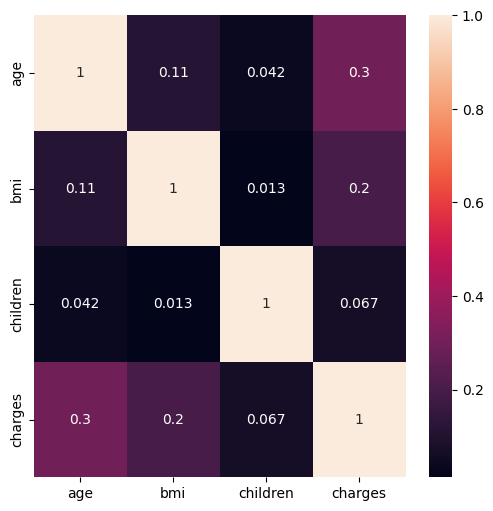

In [13]:
#Correlation heatmap for visualization
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True)
plt.show()

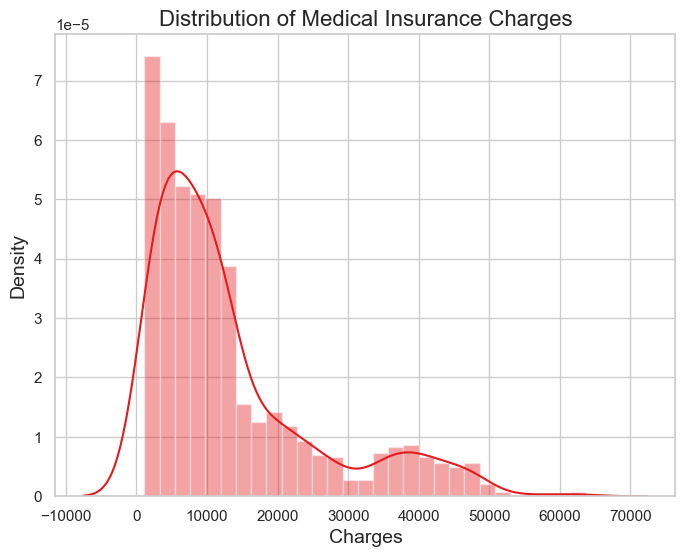

In [39]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")         # Change the color palette
ax = sns.distplot(df['charges'], kde=True)
plt.title('Distribution of Medical Insurance Charges', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Distribution seems to be right skewed, let us try to normalise it as much as possible.

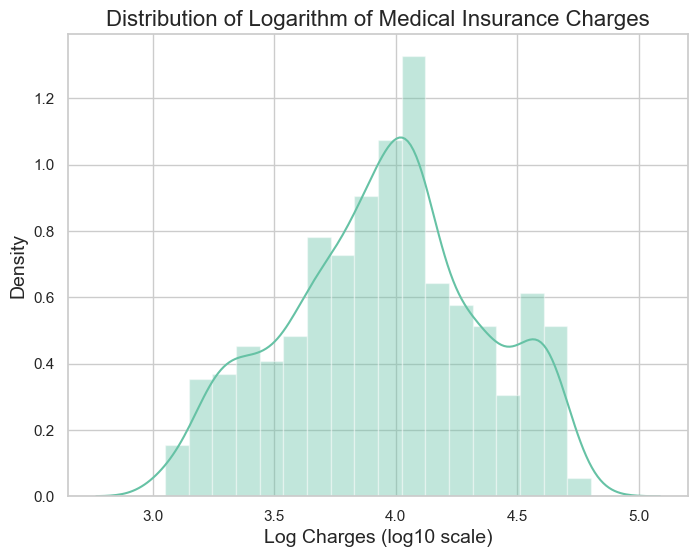

In [40]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.set_palette("Set2")  # Change the color palette
ax = sns.distplot(np.log10(df['charges']), kde=True)
plt.title('Distribution of Logarithm of Medical Insurance Charges', fontsize=16)
plt.xlabel('Log Charges (log10 scale)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

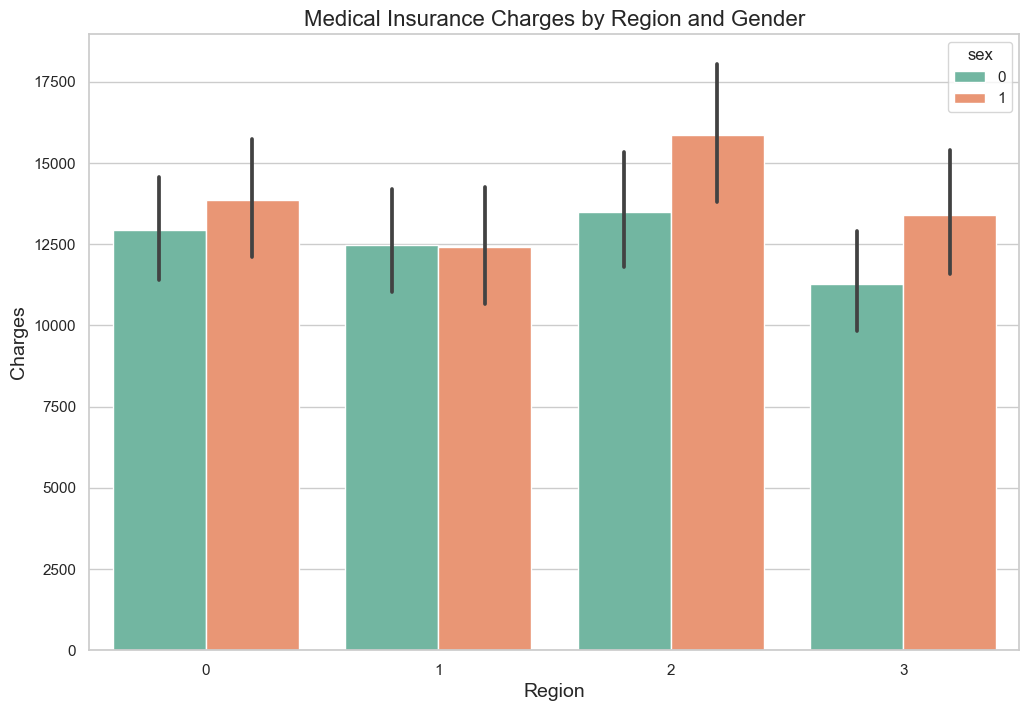

In [41]:
plt.figure(figsize=(12, 8))
palette = "Set2"  # Change the color palette to a more distinctive one
sns.set_palette(palette)

ax = sns.barplot(x='region', y='charges', hue='sex', data=df)
plt.title('Medical Insurance Charges by Region and Gender', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()

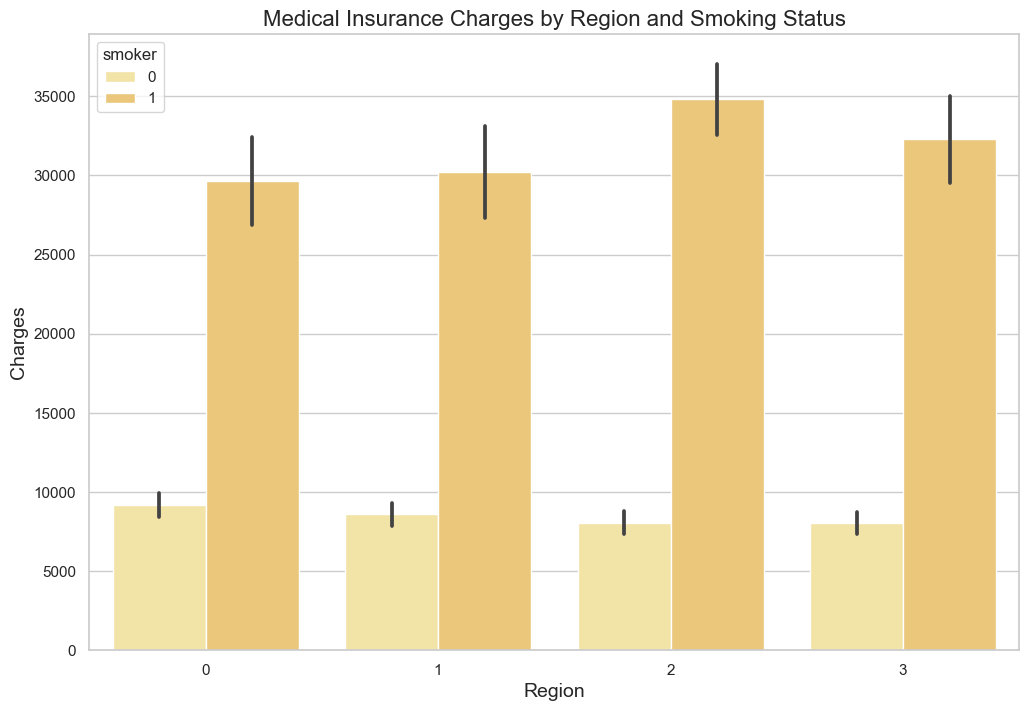

In [42]:
plt.figure(figsize=(12, 8))
palette = "YlOrRd"  # Change the color palette to a different one
sns.set_palette(palette)
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df)
plt.title('Medical Insurance Charges by Region and Smoking Status', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()

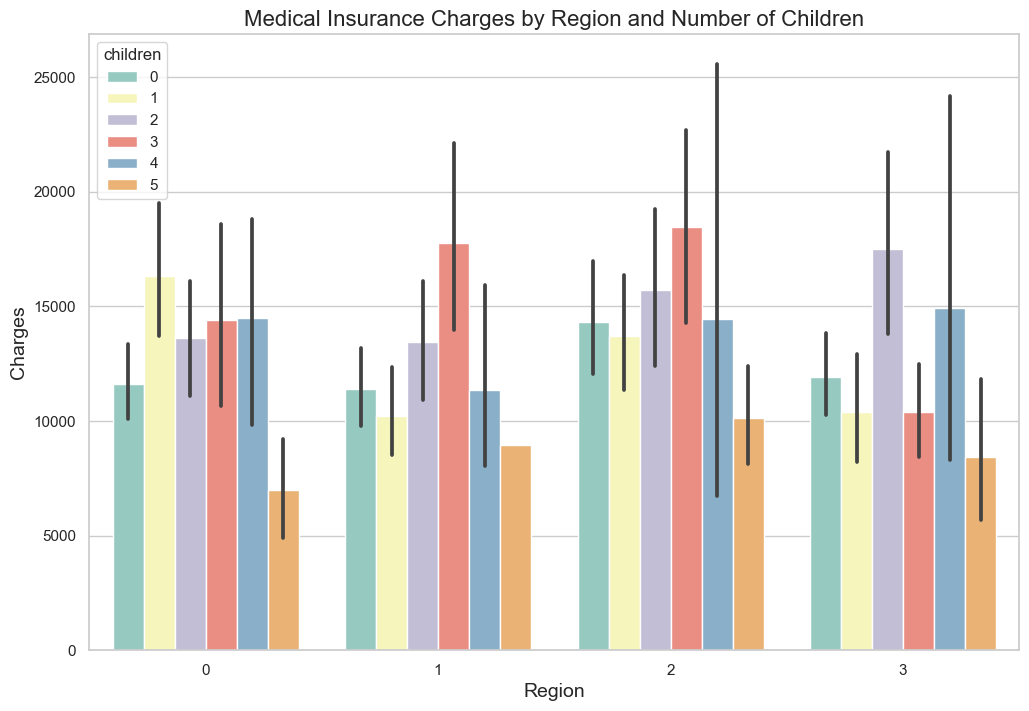

In [43]:
plt.figure(figsize=(12, 8))
palette = "Set3"  # Change the color palette to a different one
sns.set_palette(palette)
ax = sns.barplot(x='region', y='charges', hue='children', data=df)
plt.title('Medical Insurance Charges by Region and Number of Children', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

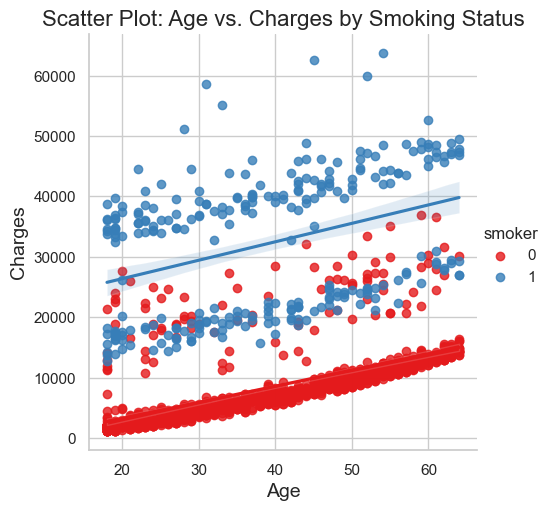

<Figure size 1200x800 with 0 Axes>

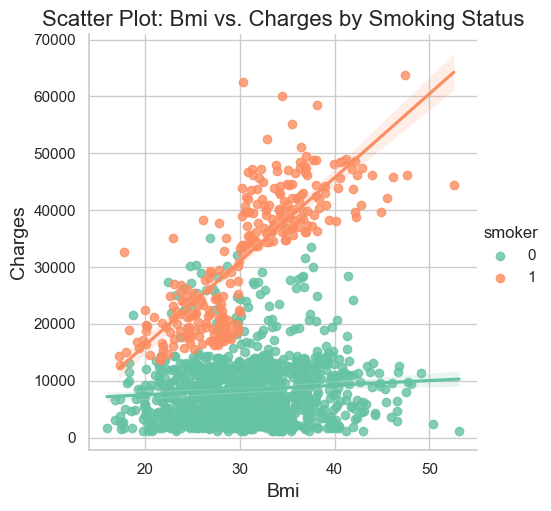

<Figure size 1200x800 with 0 Axes>

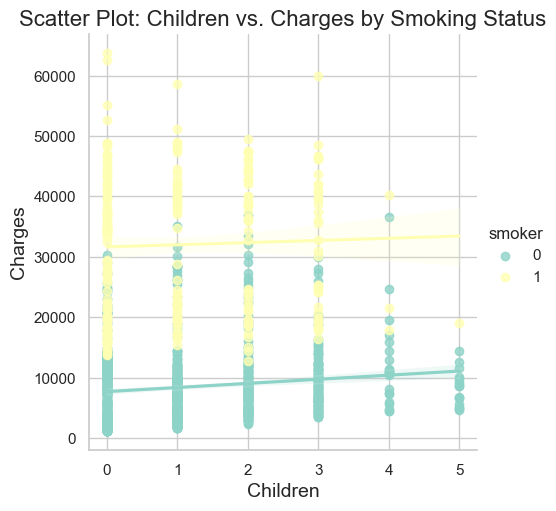

In [44]:
# Define the variables for plotting
plot_vars = ['age', 'bmi', 'children']
palettes = ["Set1", "Set2", "Set3"]

for i, var in enumerate(plot_vars):
    plt.figure(figsize=(12, 8))
    sns.set_palette(palettes[i])
    ax = sns.lmplot(x=var, y='charges', data=df, hue='smoker', palette=palettes[i])
    plt.title(f'Scatter Plot: {var.capitalize()} vs. Charges by Smoking Status', fontsize=16)
    plt.xlabel(var.capitalize(), fontsize=14)
    plt.ylabel('Charges', fontsize=14)

plt.show()

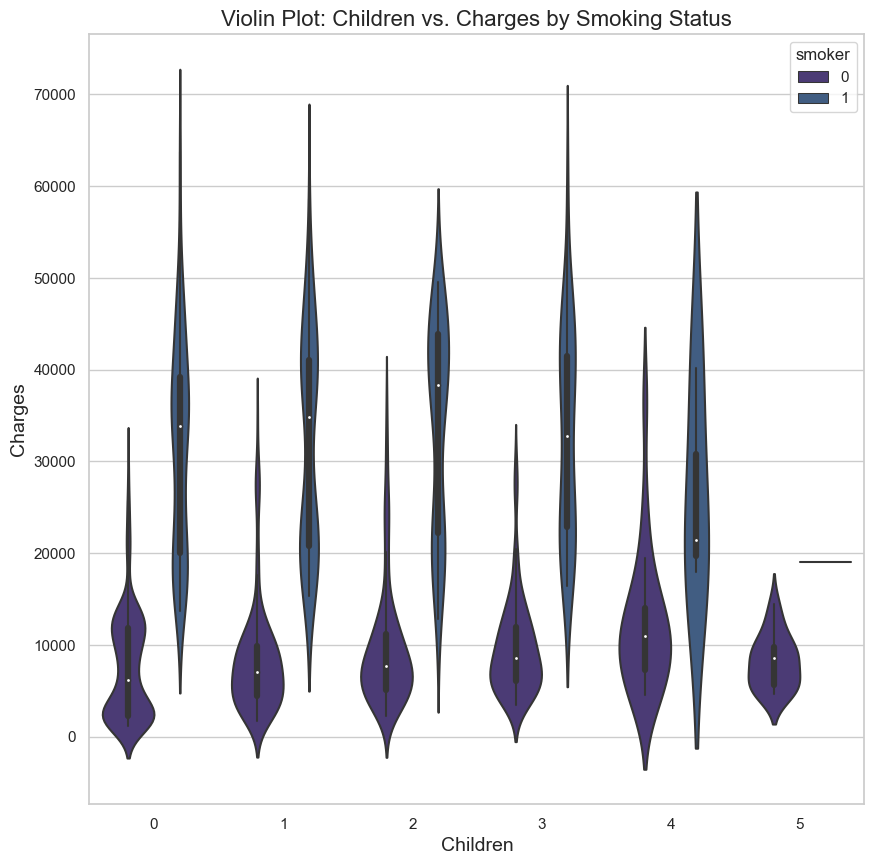

In [45]:
plt.figure(figsize=(10, 10))
sns.set_palette("viridis")  # Change the color palette
sns.violinplot(x='children', y='charges', data=df, orient='v', hue='smoker')
plt.title('Violin Plot: Children vs. Charges by Smoking Status', fontsize=16)
plt.xlabel('Children', fontsize=14)
plt.ylabel('Charges', fontsize=14)
plt.show()

In [46]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['sex', 'smoker', 'region']

label = LabelEncoder()

for col in categorical_columns:
    df[col] = label.fit_transform(df[col])

df.dtypes


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error

# Define the features and target variable
X = df.drop(['charges'], axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest Regression': RandomForestRegressor(),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Loop through the models and evaluate their performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    print(f"Model: {name}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print("\n")



Model: Linear Regression
MAE: 4400.502490291574
MSE: 41607776.51148494
RMSE: 6450.409018929337


Model: Lasso Regression
MAE: 4400.812545480756
MSE: 41607570.97741501
RMSE: 6450.393087046325


Model: Ridge Regression
MAE: 4411.409388316831
MSE: 41625668.38598501
RMSE: 6451.795748935719


Model: Random Forest Regression
MAE: 2878.3347315679916
MSE: 27262912.681147724
RMSE: 5221.389918512859


Model: Polynomial Regression
MAE: 3168.7592957835823
MSE: 29232559.168906312
RMSE: 5406.714267362971




It is quite clear that Random Forest Regressor performance better compared to other regression algorithms. So now apply hyperparameter tuning to improve its performance

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regression model
rf_reg = RandomForestRegressor()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train a Random Forest model with the best parameters
best_rf_reg = RandomForestRegressor(**best_params)
best_rf_reg.fit(x_train, y_train)

# Make predictions and calculate evaluation metrics
y_pred = best_rf_reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best Random Forest Model:")
print("Best Parameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


Best Random Forest Model:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
MAE: 2810.003777905648
MSE: 25734839.092939258
RMSE: 5072.951714035849


The performance of Random Forest Regressor is improved using hyperparameter tuning. Now lets predict the medical insurance cost:

In [57]:
# Create a DataFrame to display the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the results
print(results.head())

          Actual     Predicted
1248   1633.9618   2848.329955
610    8547.6913  11605.422795
393    9290.1395  10091.182921
503   32548.3405  34528.448915
198    9644.2525   9772.951931
